**1. Importación de librerías**

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

import seaborn as sns


In [50]:
df = pd.read_csv('house_prices.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [52]:
df = df.drop(['id', 'date'], axis=1)

**2. Preprocesamiento de los datos**

In [53]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Variables con la mayor correlación:
sqft_above     sqft_living      0.876597
sqft_living    sqft_above       0.876597
grade          sqft_living      0.762704
sqft_living    grade            0.762704
sqft_living15  sqft_living      0.756420
sqft_living    sqft_living15    0.756420
grade          sqft_above       0.755923
sqft_above     grade            0.755923
bathrooms      sqft_living      0.754665
sqft_living    bathrooms        0.754665
dtype: float64


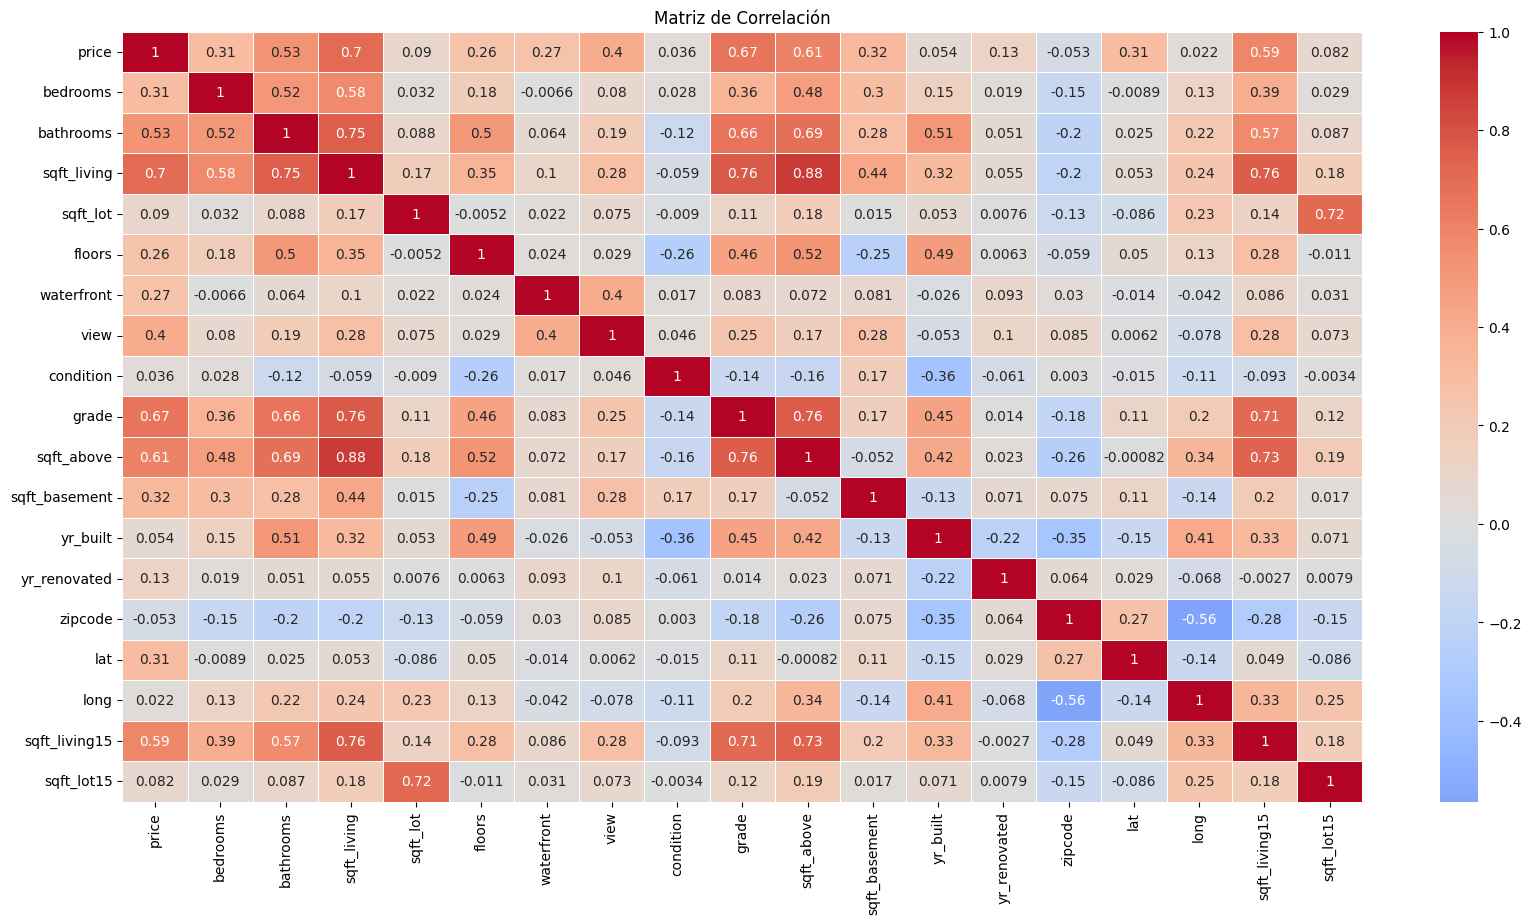

In [85]:

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Encuentra las correlaciones más altas (valores absolutos)
highest_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
highest_corr_pairs = highest_corr_pairs[highest_corr_pairs != 1.0]  # Excluir correlaciones perfectas

# Mostrar las parejas de variables con mayor correlación
print("Variables con la mayor correlación:")
print(highest_corr_pairs.head(10))

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()


In [54]:
x = df.drop('price', axis=1)
y = df['price']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [55]:
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)


**3. Modelo MLPRegressor**

In [56]:
# Creación y entrenamiento del modelo MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(250, 150, 100),
                       max_iter=500,
                       activation='relu',
                       solver='adam',
                       random_state=1,
                       alpha=0.001)
mlp_reg.fit(trainX_scaled, trainY)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(alpha=0.001, hidden_layer_sizes=(250, 150, 100), max_iter=500,
             random_state=1)

**4. Evaluación del modelo**

In [57]:
# Predicciones y evaluación
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Verdadero': testY, 'Predicho': y_pred})

**5. Comparación prediccion vs valor real**

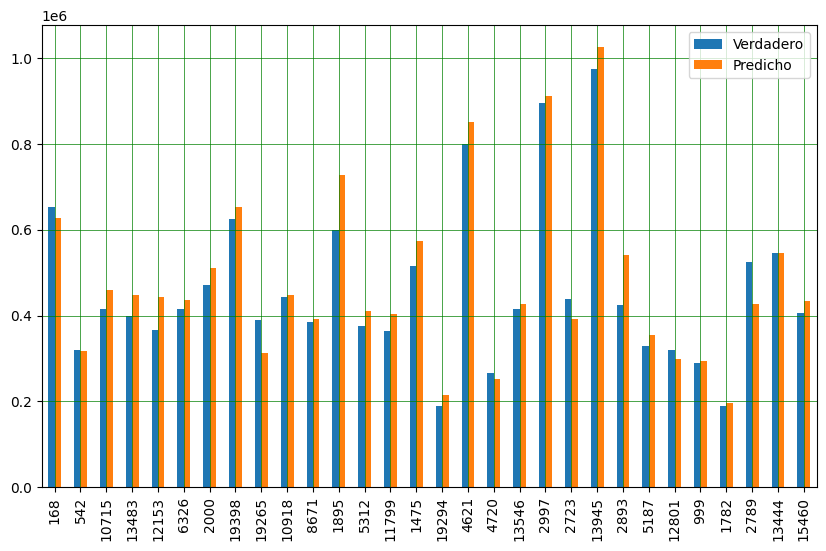

In [58]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 69306.05923467466
Mean Squared Error: 15457327640.11992
Root Mean Squared Error: 124327.50154378524


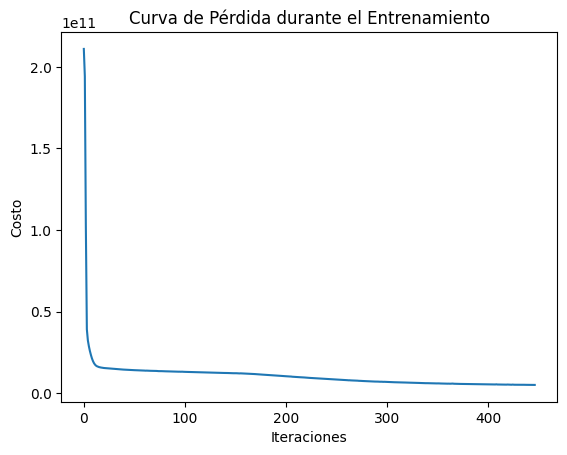

In [61]:
# Curva de pérdida durante el entrenamiento
plt.plot(mlp_reg.loss_curve_)
plt.title("Curva de Pérdida durante el Entrenamiento")
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

**6. Ajuste de hiperparámetros**

In [39]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],}

In [75]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_)

KeyboardInterrupt: ignored

In [ ]:
grid_predictions = grid.predict(testX_scaled)

In [32]:
df_temp2 = pd.DataFrame({'Verdadero': testY, 'Predicho': grid_predictions})
df_temp2.head()

NameError: ignored

In [ ]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

Mean Absolute Error: 135823.35093945125
Mean Squared Error: 42114577953.60272
Root Mean Squared Error: 205218.36651138886


**7. Modelo usando los parámetros óptimos encontrados**

In [73]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 100,activation = 'relu',
                       solver = 'adam',
                       alpha= 0.05,
                       learning_rate= 'constant')


mlp_reg.fit(trainX_scaled, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.05, hidden_layer_sizes=(150, 100, 50), max_iter=100)

**8. Evaluamos el modelo con los parámetros óptimos**

In [74]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Verdadero': testY, 'Predicho': y_pred})
df_temp.head()

,Verdadero,Predicho
168,653000.0,779020.813983
542,318888.0,397553.446892
10715,415000.0,453485.796347
13483,400000.0,379650.062760
12153,367400.0,363684.071371


**9. Comparación prediccion vs valor real**

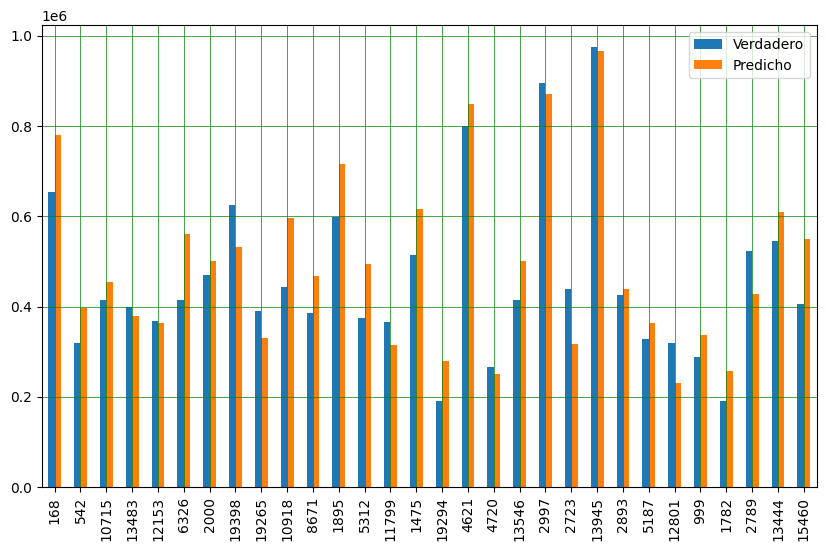

In [76]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 103508.96259963441
Mean Squared Error: 32603634122.85517
Root Mean Squared Error: 180564.76434469482


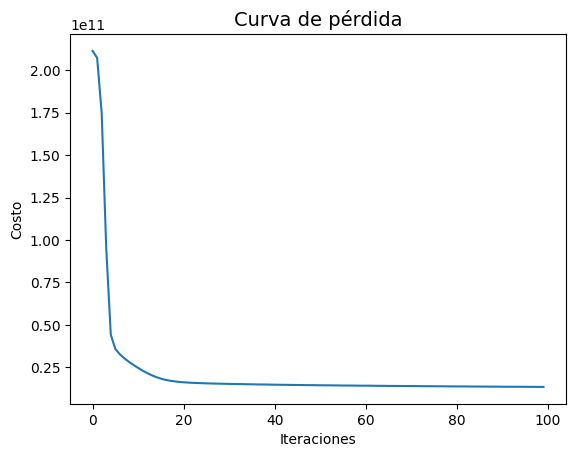

In [78]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Curva de pérdida", fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()